In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# 1) Load private dataset and build annual averages
private_df = pd.read_csv("../data/Actual/preprocessed/private_vacancies_clean.csv", parse_dates=["Date"])
private_df["Year"] = private_df["Date"].dt.year

# pick only state/territory cols (exclude Australia variants)
private_cols = [c for c in private_df.columns
                if c.endswith("_Private")
                and not c.startswith("Australia_")]

annual = private_df.groupby("Year", as_index=False)[private_cols].mean(numeric_only=True)

In [38]:
abbr = {
    "New South Wales_Private": "NSW",
    "Victoria_Private": "VIC",
    "Queensland_Private": "QLD",
    "South Australia_Private": "SA",
    "Western Australia_Private": "WA",
    "Tasmania_Private": "TAS",
    "Northern Territory_Private": "NT",
    "Australian Capital Territory_Private": "ACT",
}

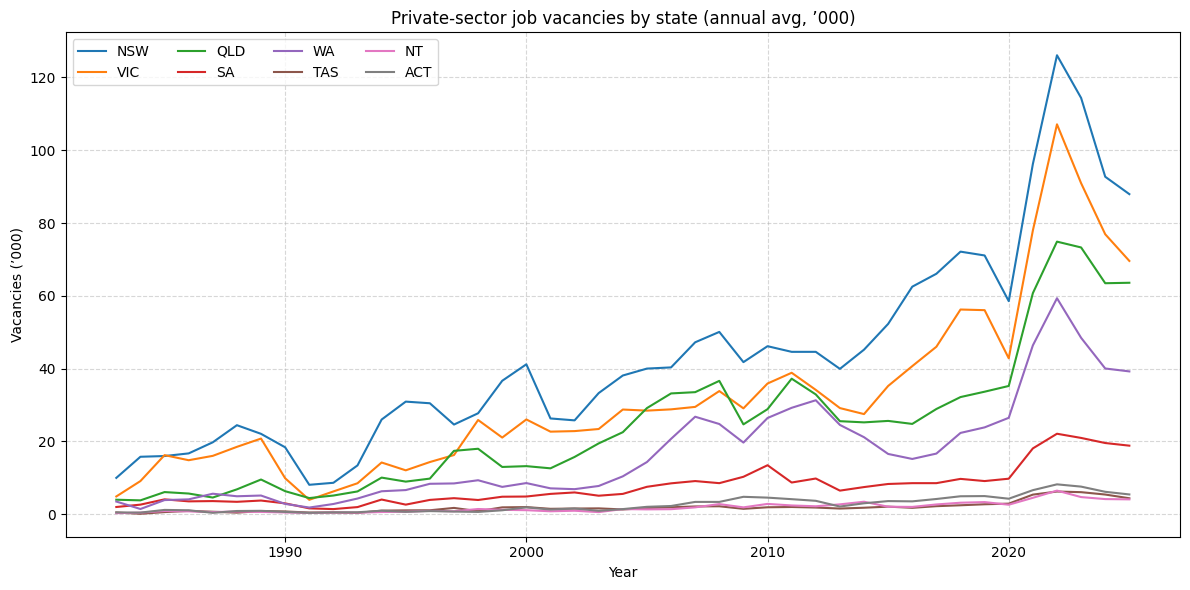

In [39]:
# 3) Line chart: annual average vacancies by state (’000)
plt.figure(figsize=(12,6))
for col in private_cols:
    plt.plot(annual["Year"], annual[col], label=abbr.get(col, col.replace("_Private","")))
plt.title("Private-sector job vacancies by state (annual avg, ’000)")
plt.xlabel("Year"); plt.ylabel("Vacancies (’000)")
plt.legend(ncol=4); plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout(); plt.show()

In [40]:
# 4) YoY growth (%): rising vs declining
growth = annual.set_index("Year")[private_cols].pct_change()*100

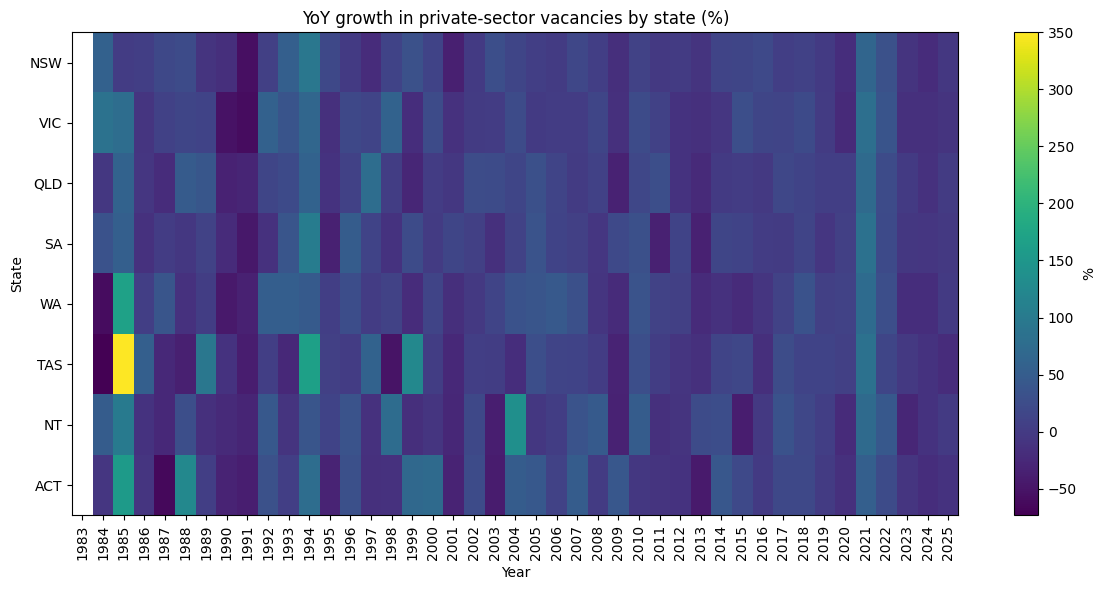

In [41]:
# Heatmap (matplotlib only)
plt.figure(figsize=(12,6))
plt.imshow(growth.T, aspect="auto", interpolation="nearest")
plt.title("YoY growth in private-sector vacancies by state (%)")
plt.xlabel("Year"); plt.ylabel("State")
plt.xticks(range(len(growth.index)), growth.index, rotation=90)
plt.yticks(range(len(private_cols)), [abbr.get(c, c.replace("_Private","")) for c in private_cols])
plt.colorbar(label="%"); plt.tight_layout(); plt.show()

In [42]:
public_df = pd.read_csv("../data/Actual/preprocessed/public_vacancies_clean.csv", parse_dates=["Date"])
public_df["Year"] = public_df["Date"].dt.year
public_cols = [c for c in public_df.columns if c.endswith("_Public") and not c.startswith("Australia_")]
annual_pub = public_df.groupby("Year", as_index=False)[public_cols].mean(numeric_only=True)

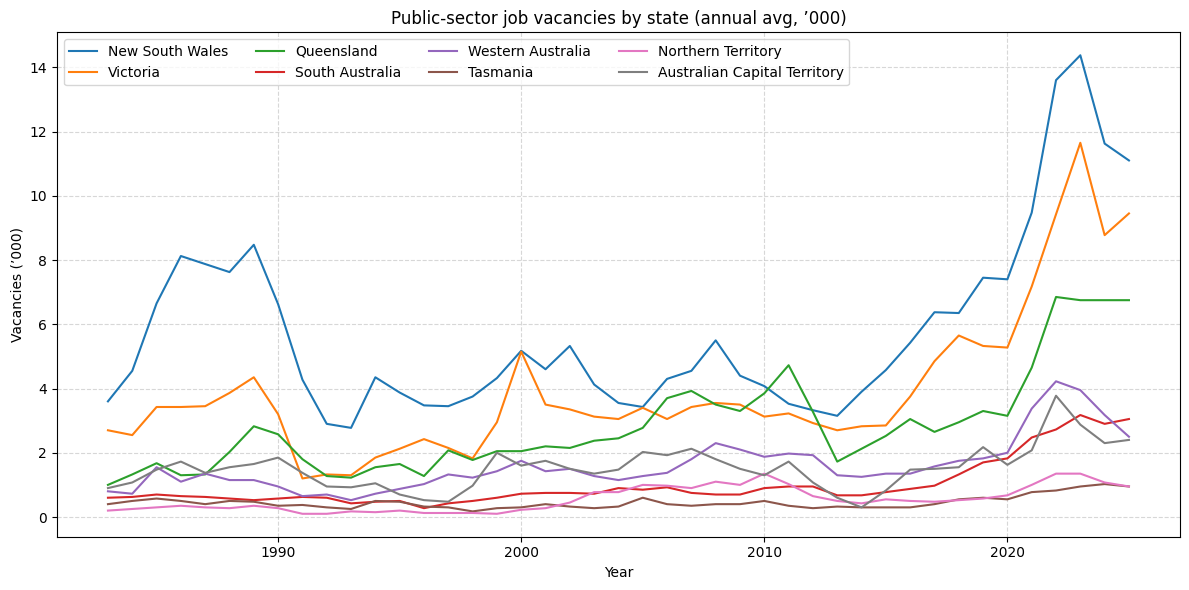

In [45]:
plt.figure(figsize=(12,6))
for col in public_cols:
    plt.plot(annual_pub["Year"], annual_pub[col],
             label=abbr.get(col, col.replace("_Public","")))
plt.title("Public-sector job vacancies by state (annual avg, ’000)")
plt.xlabel("Year"); plt.ylabel("Vacancies (’000)")
plt.legend(ncol=4); plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout(); plt.show()


In [48]:
# YoY growth (%) for PUBLIC
growth = annual_pub.set_index("Year")[public_cols].pct_change() * 100


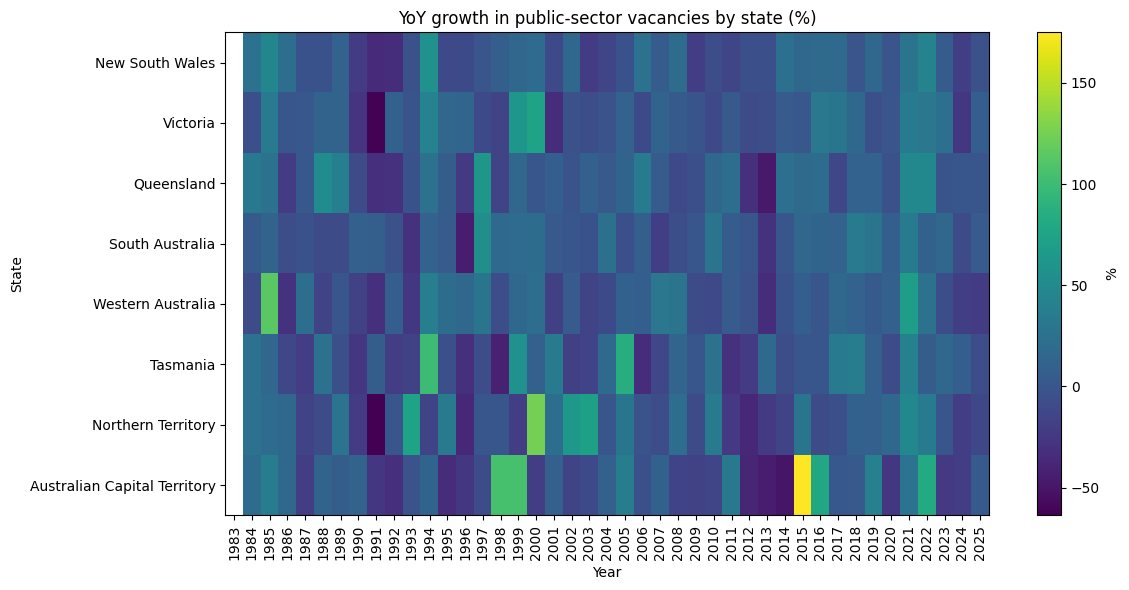

In [49]:
plt.figure(figsize=(12,6))
plt.imshow(growth.T, aspect="auto", interpolation="nearest")
plt.title("YoY growth in public-sector vacancies by state (%)")
plt.xlabel("Year"); plt.ylabel("State")
plt.xticks(range(len(growth.index)), growth.index, rotation=90)
plt.yticks(range(len(public_cols)), [abbr.get(c, c.replace("_Public","")) for c in public_cols])
plt.colorbar(label="%"); plt.tight_layout(); plt.show()

In [50]:
# Total (all sectors)
state_df = pd.read_csv("../data/Actual/preprocessed/state_vacancies_clean.csv", parse_dates=["Date"])
state_df["Year"] = state_df["Date"].dt.year
state_cols = [c for c in state_df.columns if c.endswith("_Total") and not c.startswith("Australia_")]
annual_state = state_df.groupby("Year", as_index=False)[state_cols].mean(numeric_only=True)

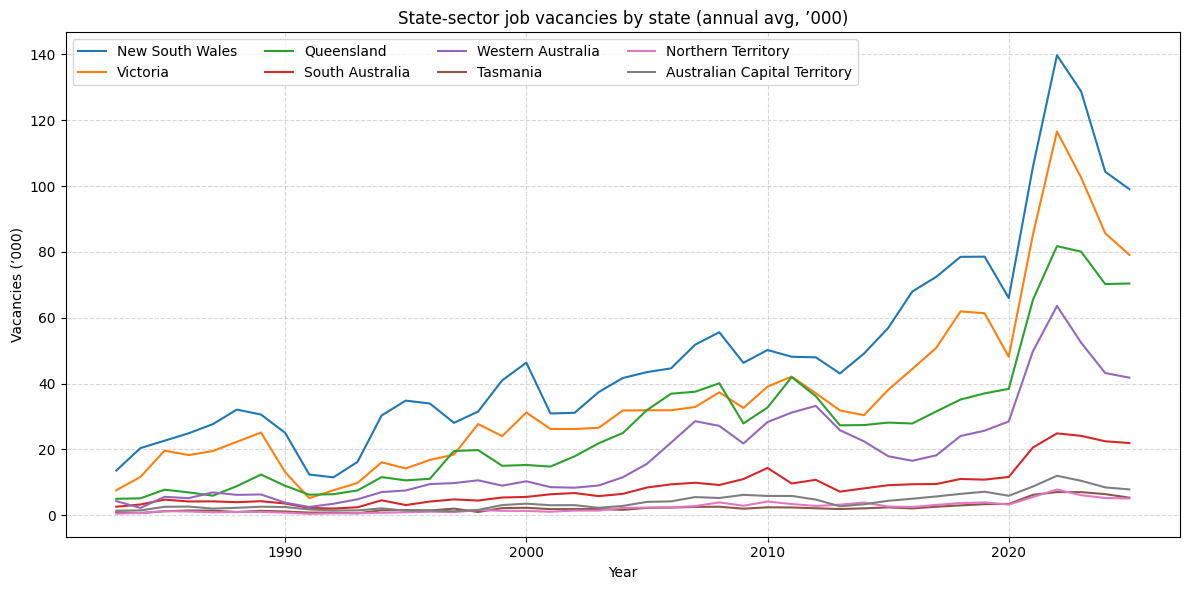

In [52]:
plt.figure(figsize=(12,6))
for col in state_cols:
    plt.plot(annual_state["Year"], annual_state[col],
             label=abbr.get(col, col.replace("_Total","")))
plt.title("State-sector job vacancies by state (annual avg, ’000)")
plt.xlabel("Year"); plt.ylabel("Vacancies (’000)")
plt.legend(ncol=4); plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout(); plt.show()

In [56]:
# 1. Build the correct state columns for TOTAL dataset
total_cols = [c for c in annual_state.columns 
              if c.endswith("_Total") and not c.startswith("Australia_")]

# 2. Compute YoY growth for states
growth = annual_state.set_index("Year")[total_cols].pct_change() * 100


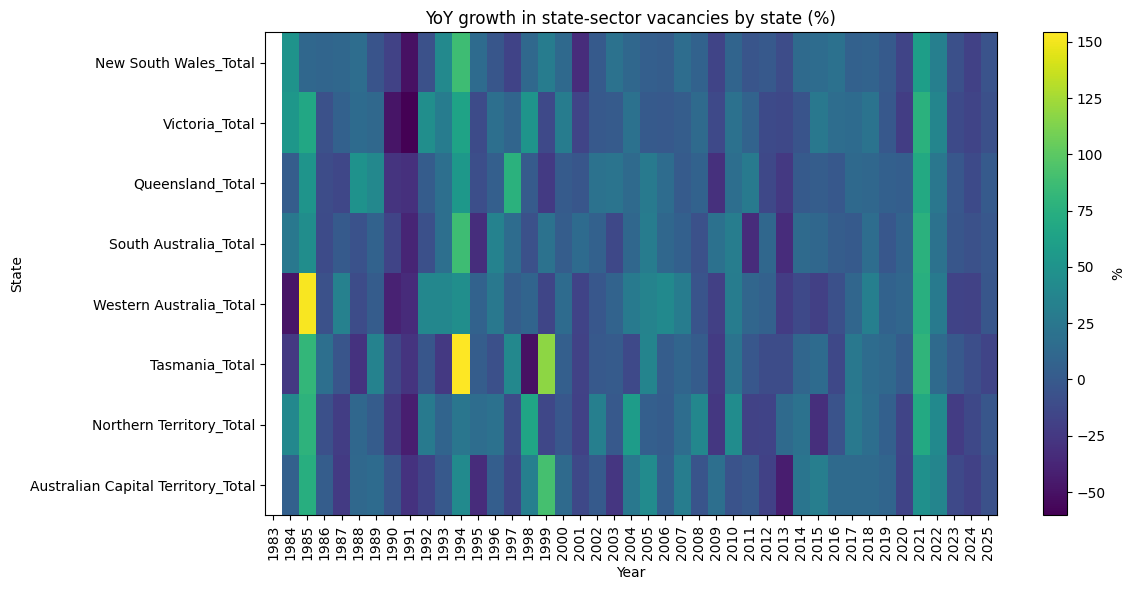

In [57]:
plt.figure(figsize=(12,6))
plt.imshow(growth.T, aspect="auto", interpolation="nearest")
plt.title("YoY growth in state-sector vacancies by state (%)")
plt.xlabel("Year"); plt.ylabel("State")
plt.xticks(range(len(growth.index)), growth.index, rotation=90)
plt.yticks(range(len(state_cols)), [abbr.get(c, c.replace("_Public","")) for c in state_cols])
plt.colorbar(label="%"); plt.tight_layout(); plt.show()

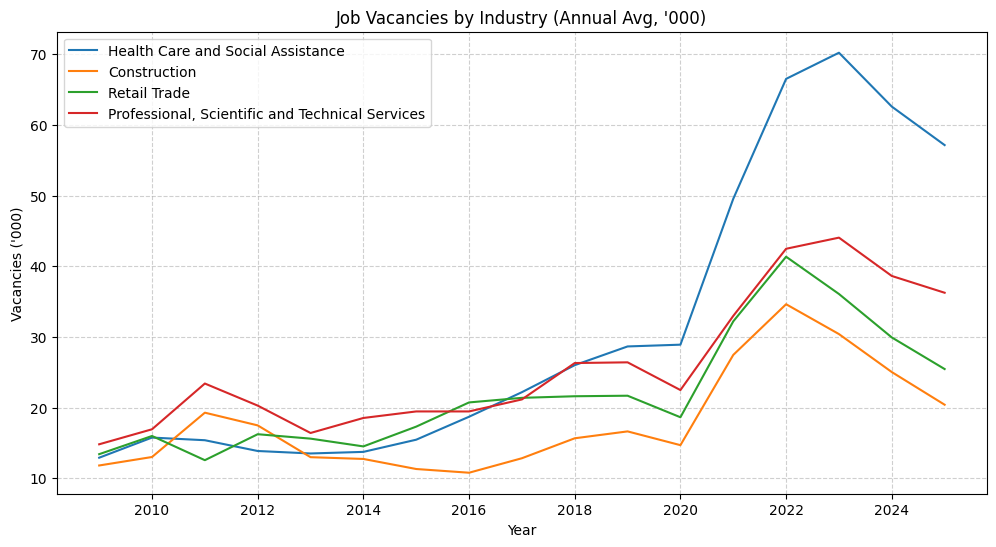

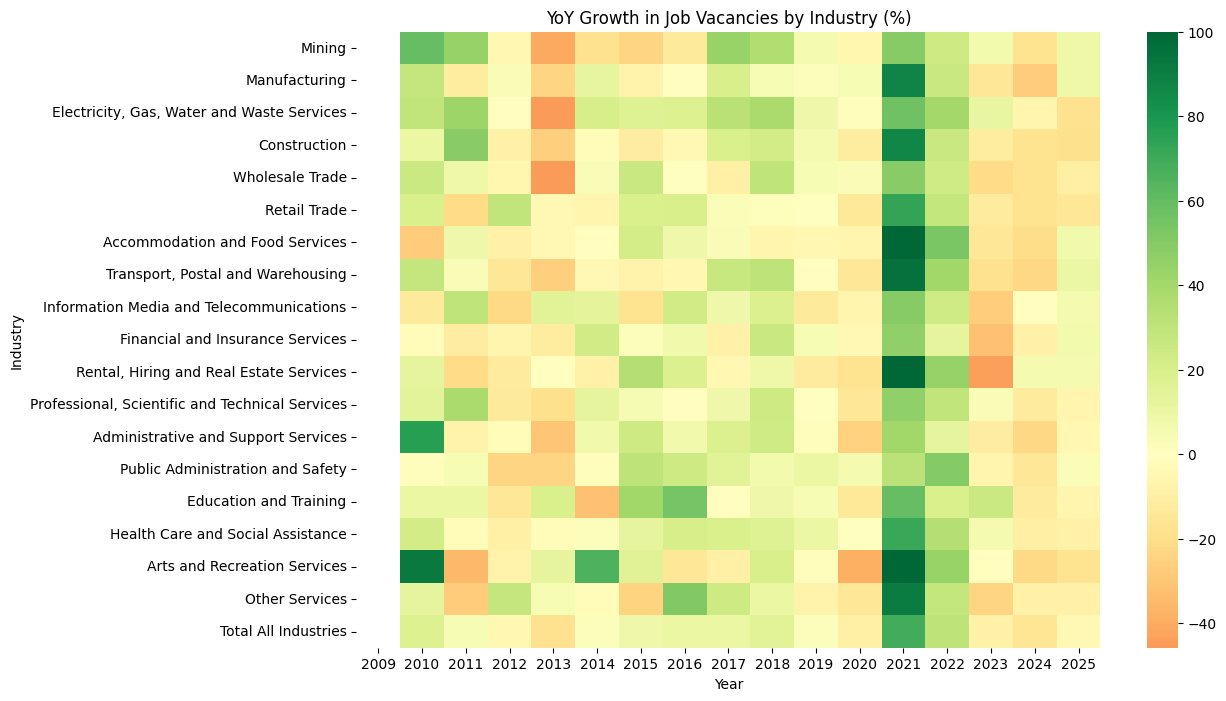

In [59]:

import seaborn as sns
industry_df = pd.read_csv("../data/actual/preprocessed/job_vacancies_clean.csv", parse_dates=["Date"])

# Yearly aggregation
industry_df["Year"] = industry_df["Date"].dt.year
industry_cols = [c for c in industry_df.columns if c not in ["Date","Year"] and not c.startswith("SE_")]

annual = industry_df.groupby("Year")[industry_cols].mean().reset_index()

# Plot trends for a few big industries
plt.figure(figsize=(12,6))
for col in ["Health Care and Social Assistance", "Construction", "Retail Trade", "Professional, Scientific and Technical Services"]:
    plt.plot(annual["Year"], annual[col], label=col)
plt.title("Job Vacancies by Industry (Annual Avg, '000)")
plt.xlabel("Year"); plt.ylabel("Vacancies ('000)")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# YoY Growth (heatmap)
growth = annual.set_index("Year")[industry_cols].pct_change() * 100
plt.figure(figsize=(12,8))
sns.heatmap(growth.T.clip(-100,100), cmap="RdYlGn", center=0, annot=False)
plt.title("YoY Growth in Job Vacancies by Industry (%)")
plt.xlabel("Year"); plt.ylabel("Industry")
plt.show()